In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Try reading the file with a different encoding
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')
# If 'latin-1' doesn't work, try other encodings like 'iso-8859-1', 'utf-16', etc.

Exploratory Data Analysis

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis='columns')

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.dtypes

v1    object
v2    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

Visual Representation

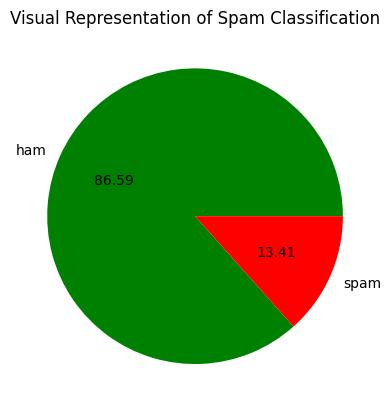

In [ ]:
plt.pie(df['v1'].value_counts(), labels= ['ham', 'spam'], colors=['green','red'], autopct='%0.2f')
plt.title("Visual Representation of Spam Classification")
plt.show()

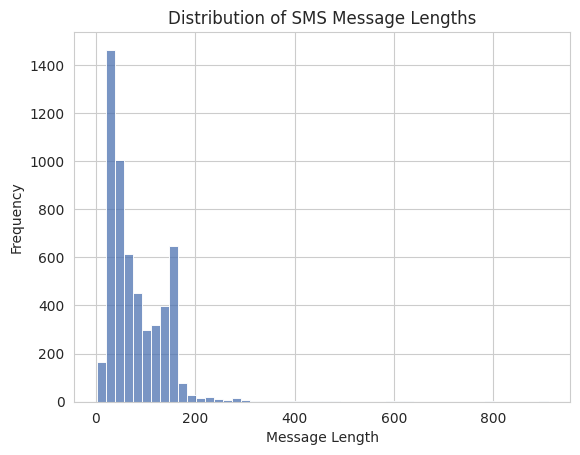

In [ ]:
message_lengths = df['v2'].apply(len)
sns.set_style('whitegrid')
sns.set_palette('deep')
sns.histplot(message_lengths, bins=50, kde=False)
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of SMS Message Lengths')
plt.show()

Text(0.5, 1.0, 'Distribution of spam and ham messages')

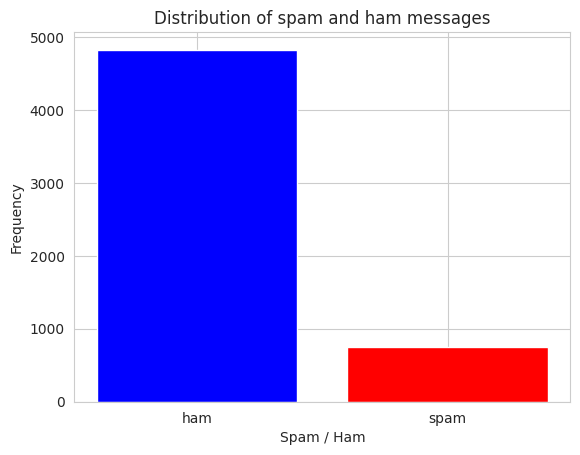

In [ ]:
plt.bar(df['v1'].value_counts().index, df['v1'].value_counts(), color=['blue','red'])
plt.xlabel('Spam / Ham')
plt.ylabel('Frequency')
plt.title('Distribution of spam and ham messages')

Data Cleaning and Preprocessing

In [ ]:
df['v1'].replace({'ham':0, 'spam':1}, inplace=True)

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for word in text:
    if word.isalnum():
      y.append(word)

  text = y[:]
  y.clear()

  for word in text:
    if word not in stopwords.words('english') and word not in string.punctuation:
      y.append(word)

  text = y[:]
  y.clear()

  for word in text:
    y.append(ps.stem(word))

  return y

In [42]:
df['v2'].apply(transform_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: v2, Length: 5572, dtype: object

In [43]:
df['transformed_text'] = df['v2'].apply(transform_text)

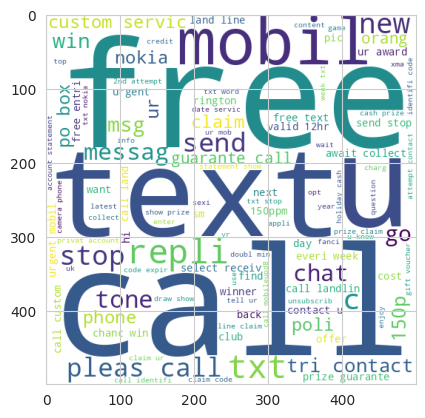

In [51]:
from wordcloud import WordCloud
spam_words = " ".join(df[df['v1']==1]['transformed_text'].explode())

spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc.generate(spam_words)
plt.imshow(spam_wc)

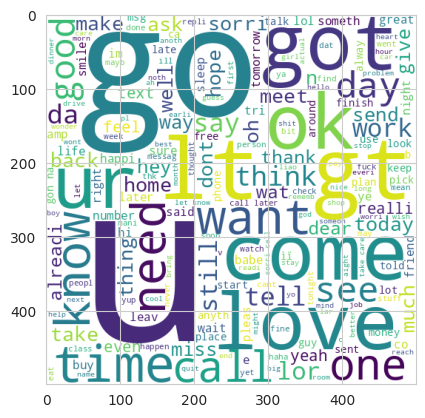

In [54]:
from wordcloud import WordCloud
ham_words = " ".join([str(word) for word in df[df['v1']==0]['transformed_text'].explode()])

ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc.generate(ham_words)
plt.imshow(ham_wc)

In [62]:
spam_corpus= []
for msg in df[df['v1']==1]['transformed_text'].tolist():
  msg_split = " ".join(msg)
  for word in msg_split.split():
    spam_corpus.append(word)


We will display top 30 words of spam messages

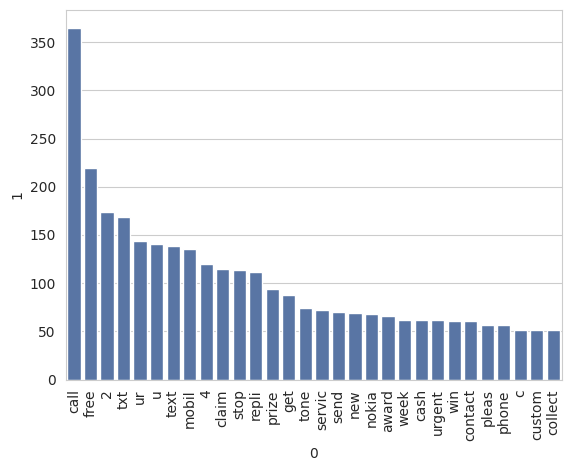

In [69]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


X-axis: Displays the 30 most common words in spam_corpus.
Y-axis: Shows the frequency (count) of each of these words.

In [70]:
ham_corpus= []
for msg in df[df['v1']==0]['transformed_text'].tolist():
  msg_split = " ".join(msg)
  for word in msg_split.split():
    ham_corpus.append(word)

Most Common 30 ham messages list

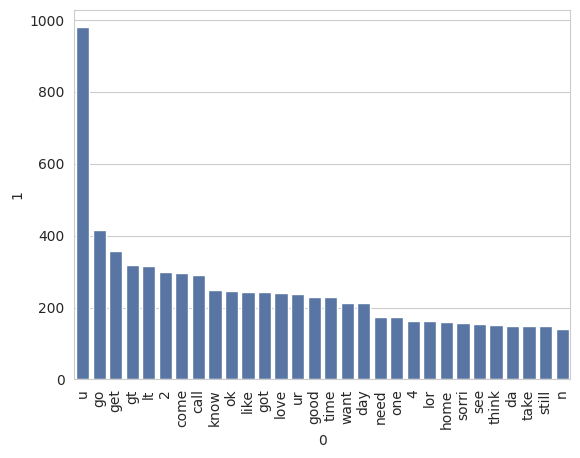

In [72]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

Using bag of words to vectorize the data

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['v2']).toarray()
y = df['v1'].values

In [82]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
y

array([0, 0, 1, ..., 0, 0, 0])

Splitting the data into train test split

In [84]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
len(Xtrain)

4457

In [86]:
len(Xtest)

1115

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
model = MultinomialNB()
model.fit(Xtrain, ytrain)

MultinomialNB()

Predicting the model

In [90]:
emails = [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
model.predict(cv.transform(emails).toarray())

array([0, 1])

<Axes: >

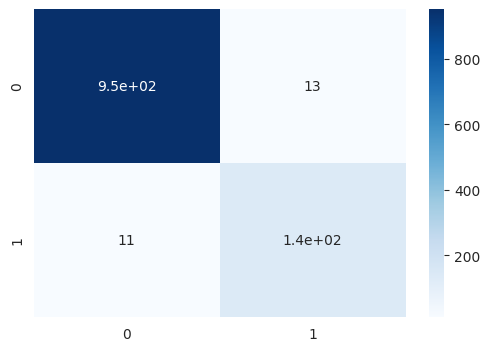

In [98]:
from sklearn.metrics import confusion_matrix
ypred = model.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,cmap="Blues")


Checking the accuracy

In [ ]:
model.score(Xtest, ytest)

0.97847533632287

Got an accuracy of 97 %